In [1]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from IPython.display import display, Markdown

from src import soporte_transformacion as sp_t

<Figure size 640x480 with 0 Axes>

In [2]:
pd.set_option('display.max_columns', None)

1. **Exploración Inicial:**

   - identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.
   - Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, nulos y estadísticas básicas.
   - Une los dos conjuntos de datos de la forma más eficiente. 

### Lectura CSV: 
Dos archivos que describen el comportamiento de los clientes dentro de un programa de lealtad de una aerolínea. 

In [3]:
df = pd.read_csv('Files\Customer Flight Activity.csv')

In [4]:
df.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [5]:
df.tail()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


In [6]:
df.shape

(405624, 10)

In [7]:
df_sub = pd.read_csv('Files\Customer Loyalty History.csv')

In [8]:
df_sub.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [9]:
df_sub.shape

(16737, 16)

Tenemos dos csv que comparten una columna en común "Loyalty Number", por lo que vamos a realizar su unión por esta columna: 
1. primero observamos que en ambos csv la columna es int
2. comprobamos valores nulos en ambas para no perder coincidencias.
3. outer merge conserva todos los registros de ambas tablas, incluso sin coincidencias.

In [10]:
df['Loyalty Number'].dtype

dtype('int64')

In [11]:
df_sub['Loyalty Number'].dtype

dtype('int64')

In [12]:
df['Loyalty Number'].isna().sum()

np.int64(0)

In [13]:
df_sub['Loyalty Number'].isna().sum()

np.int64(0)

A simple vista, no parece que los valores unicos tengan nada que ver entre ambas columnas, pero es un rango demasiado grande.

In [14]:
df['Loyalty Number'].unique()

array([100018, 100102, 100140, ..., 999731, 999788, 999891])

In [15]:
df_sub['Loyalty Number'].unique()

array([480934, 549612, 429460, ..., 776187, 906428, 652627])

### Unión CSV

In [16]:
df_total = pd.merge(df, df_sub, how='outer', on='Loyalty Number')

In [17]:
df_total.head(4)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


Finalmente si había coincidencias en Loyalty Number, ya que el número de filas no se ha visto incrementado. Sí por el contrario el de columnas. Como hemos usado un outer merge todos los clientes (df_sub) tenían al menos una transacción. a simple vista ya vemos duplicados en loyalty number, pero con distintos registros en los vuelos, no así en sus datos personales.

In [18]:
df.shape

(405624, 10)

In [19]:
df_total.shape

(405624, 25)

### Exploración Inicial:
Buscamos duplicados (en relación con los pasos anteriores)

In [20]:
df_total.duplicated().sum() #FILAS 100% IDÉNTICAS [ojo, es información duplicada que puede distorsionar los conteos]

np.int64(1864)

In [21]:
df_total.duplicated(subset='Loyalty Number').sum() #CLIENTES CON MÁS DE UN REGISTRO

np.int64(388887)

In [22]:
df_total[df_total.duplicated()].head(4) ##NOTA CONFIRMAMOS QUE NO SON DUPLICADOS SON REGISTROS MESUALES DEL MISMO CLIENTE NO SE ELIMINAN FILAS.

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
985,101902,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
988,101902,2017,2,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
990,101902,2017,3,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
998,101902,2017,7,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN


In [23]:
df_total[df_total.duplicated(keep=False)].head(4) ##OJO con Keep=False si obtengo duplicados reales. 

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
984,101902,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
985,101902,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
987,101902,2017,2,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
988,101902,2017,2,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN


In [24]:
df_total[df_total.duplicated(keep=False)].sort_values(by='Loyalty Number').head(6)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
985,101902,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
984,101902,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
990,101902,2017,3,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
989,101902,2017,3,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
988,101902,2017,2,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
987,101902,2017,2,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN


### Eliminamos duplicados:
eliminamos filas con duplicados exactos en el 100% de la fila, manteniendo la primera aparición. Necesario para un analisis con datos limpios.

In [25]:
df_total = df_total.drop_duplicates()

In [26]:
df_total.duplicated().sum()

np.int64(0)

In [27]:
df_total.head(4)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


In [28]:
#COMPROBACIONES CON LA PRIMERA COINCIDENCIA

df_total[df_total['Loyalty Number'] == 101902].sort_values(by='Year').head(4)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
984,101902,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
987,101902,2017,2,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
989,101902,2017,3,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
991,101902,2017,4,4,0,4,1460,146.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN


In [29]:
df_total[df_total['Loyalty Number'] == 101902].duplicated().sum()

np.int64(0)

### Continuamos con el análisis exploratorio

In [30]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
 10  Country                      403760 non-null  object 
 11  Province                     403760 non-null  object 
 12  City                         403760 non-null  object 
 13  Post

In [31]:
round(df_total.isna().sum()/df.shape[0]*100,2)

Loyalty Number                  0.00
Year                            0.00
Month                           0.00
Flights Booked                  0.00
Flights with Companions         0.00
Total Flights                   0.00
Distance                        0.00
Points Accumulated              0.00
Points Redeemed                 0.00
Dollar Cost Points Redeemed     0.00
Country                         0.00
Province                        0.00
City                            0.00
Postal Code                     0.00
Gender                          0.00
Education                       0.00
Salary                         25.21
Marital Status                  0.00
Loyalty Card                    0.00
CLV                             0.00
Enrollment Type                 0.00
Enrollment Year                 0.00
Enrollment Month                0.00
Cancellation Year              87.30
Cancellation Month             87.30
dtype: float64

NOTAS:
- Encontramos nulos en Salary, Cancellation Year, Cancellation Month y son tipo float cambiar a Int64?. Dependerá de como tratemos los nulos, pero Cancellation Year y Cancellation Month son fechas, deben ser enteros.
- Points Accumulated float, pero como 152.0 (no presenta nulos). Mantenemos como floats, pueden ser acumulados en este formato y sólo poder gastarse en formato int64.
- salary float a pesar de ser enteros, quizas el .0 viene dado por pandas por la presencia de nulos.
- datos limpios

In [32]:
df_total.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.00,326699.00,550598.00,772152.00,999986.00
Year,403760.0,2017.500352,0.500000,2017.00,2017.00,2018.00,2018.00,2018.00
Month,403760.0,6.501335,3.451982,1.00,4.00,7.00,10.00,12.00
Flights Booked,403760.0,4.134050,5.230064,0.00,0.00,1.00,8.00,21.00
Flights with Companions,403760.0,1.036569,2.080472,0.00,0.00,0.00,1.00,11.00
Total Flights,403760.0,5.170619,6.526858,0.00,0.00,1.00,10.00,32.00
Distance,403760.0,1214.460979,1434.098521,0.00,0.00,525.00,2342.00,6293.00
Points Accumulated,403760.0,124.263761,146.696179,0.00,0.00,53.00,240.00,676.50
Points Redeemed,403760.0,30.838587,125.758002,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,403760.0,2.495973,10.172033,0.00,0.00,0.00,0.00,71.00


OBSERVAMOS:

Distance: 
la mediana es baja respecto a la media, lo que indica que hay distancias largas que tiran de este dato hacia arriba.

Flights Booked (Vuelos reservados): 
la medina es sólo 1 frente al máximo 21. claramente valores atípicos que tiran hacia arriba de la media con 4, pero lo normal es 1 vuelo.

Flights with Companions y Total Flights: 
igualmente valores atípicos alteran la media en ambos casos.

Salary: 
ese valor negativo en min() y su cantidad de nulos respecto al total, count().

Points Accumulated y Points Redeemed: su max no es parejo. 




==================== ANALISIS ESTADÍSTICO COLUMNA: Distance ====================
---------------------------------------------------------------------------
El mínimo de Distance es: 0
---------------------------------------------------------------------------
El máximo de Distance es: 6293
---------------------------------------------------------------------------
La media de Distance es: 1214.4609792946305
---------------------------------------------------------------------------
La mediana de Distance es: 525.0
---------------------------------------------------------------------------
La Desviación Estandar de Distance es: 1434.098520958781
---------------------------------------------------------------------------
==================== VALORES NULOS COLUMNA: Distance ====================
---------------------------------------------------------------------------
Porcentaje nulos de Distance: 0.0
---------------------------------------------------------------------------
==========

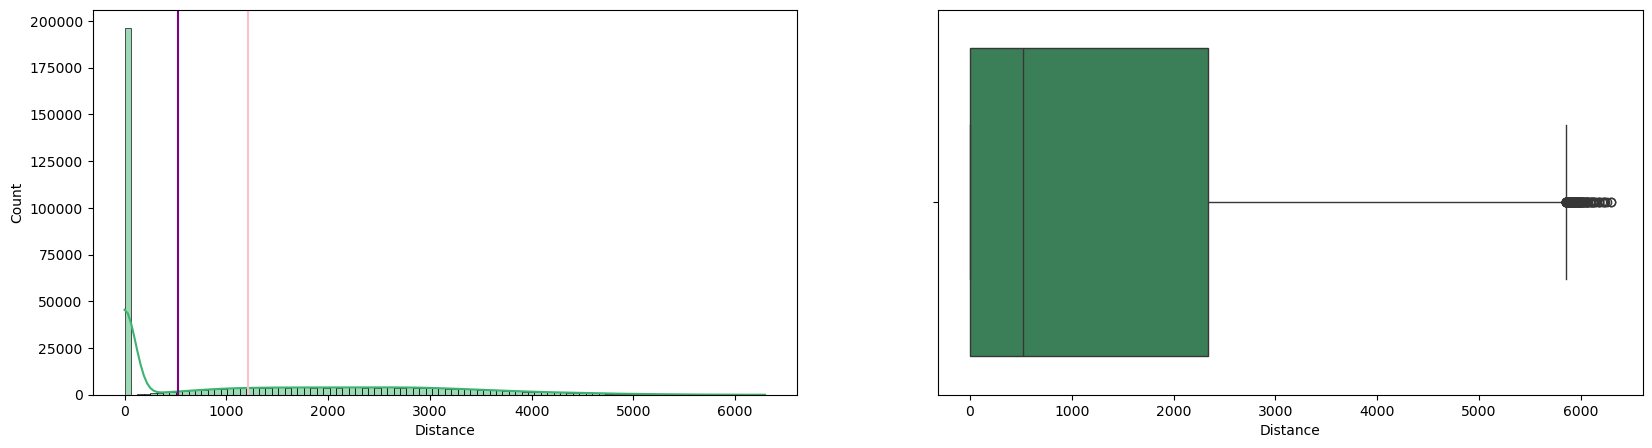

In [33]:
sp_t.exploracion_numerica(df_total, 'Distance')

confirmamos que la mayoría de los vuelos son de baja distancia y que los valores atípicos tiran de la media hacia la derecha respecto a la mediana. el 50% de los datos lo acumulamos entre 0 y 2300 aprox. en las distancias más cortas, siendo distancias atípicas a partir de 6000km.


==================== ANALISIS ESTADÍSTICO COLUMNA: Flights Booked ====================
---------------------------------------------------------------------------
El mínimo de Flights Booked es: 0
---------------------------------------------------------------------------
El máximo de Flights Booked es: 21
---------------------------------------------------------------------------
La media de Flights Booked es: 4.134049930651872
---------------------------------------------------------------------------
La mediana de Flights Booked es: 1.0
---------------------------------------------------------------------------
La Desviación Estandar de Flights Booked es: 5.230063724478086
---------------------------------------------------------------------------
==================== VALORES NULOS COLUMNA: Flights Booked ====================
---------------------------------------------------------------------------
Porcentaje nulos de Flights Booked: 0.0
-------------------------------------------

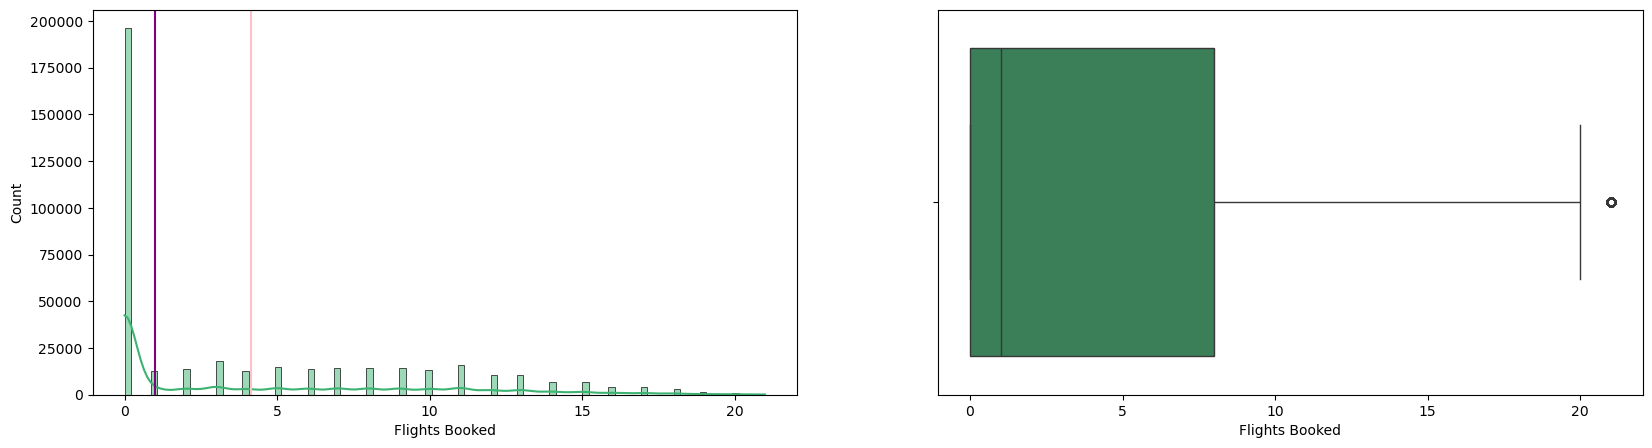

In [34]:
sp_t.exploracion_numerica(df_total, 'Flights Booked')

la gran mayoría de reservas se realizan entre 0 y 1, con sesgo positivo hacia la derecha, que como hemos comentado tira de la media. Esto falsea la realidad ya que el promedio de los clientes no llegaría a 4 reservas. La desviación estandar nos confirma la variación por outliers.
el 50% de los datos se concentra entre 0 y 8, extendiendose hasta 20 o más con valores atípicos. 

==================== ANALISIS ESTADÍSTICO COLUMNA: Salary ====================
---------------------------------------------------------------------------
El mínimo de Salary es: -58486.0
---------------------------------------------------------------------------
El máximo de Salary es: 407228.0
---------------------------------------------------------------------------
La media de Salary es: 79258.57628524046
---------------------------------------------------------------------------
La mediana de Salary es: 73479.0
---------------------------------------------------------------------------
La Desviación Estandar de Salary es: 34983.92979817792
---------------------------------------------------------------------------
==================== VALORES NULOS COLUMNA: Salary ====================
---------------------------------------------------------------------------
Porcentaje nulos de Salary: 0.25
---------------------------------------------------------------------------
=============

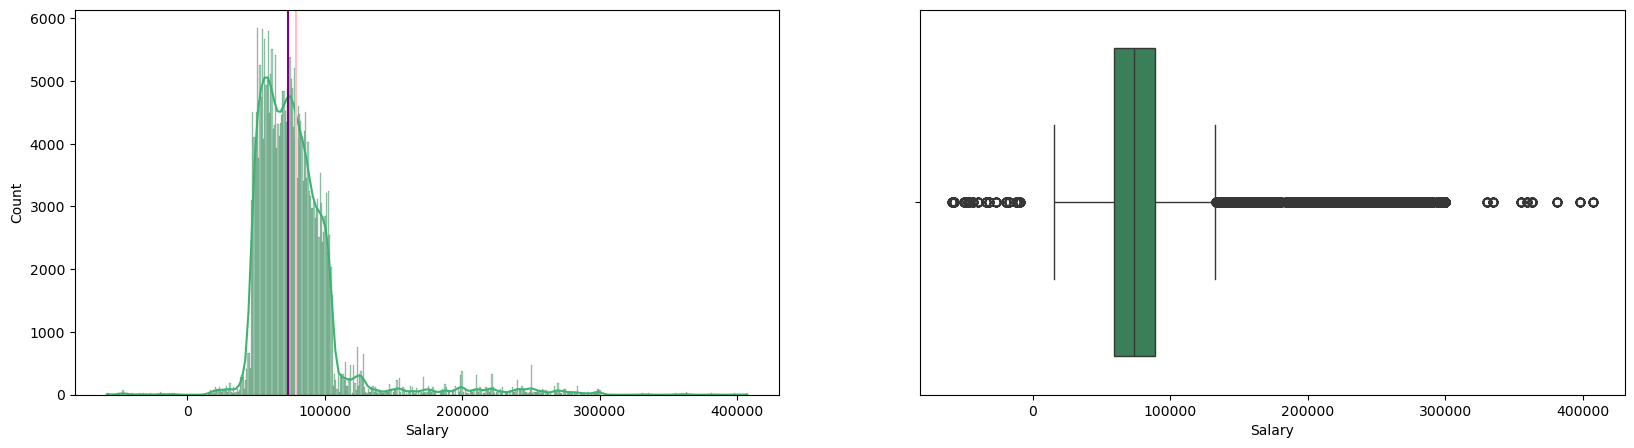

In [35]:
sp_t.exploracion_numerica(df_total, 'Salary')

Tenemos salarios agrupados pero con un sesgo positivo hacia la derecha y un ligero sesgo negativo hacia la izquierda aunque no tan fuerte. media y mediana bastante equilibradas, aunque los valores atípicos tiran de la media un poco hacia la derecha. El 50% de los sueldos se agrupan entre 60 y 80, aunque hay valores atípicos con sueldos muy altos que afectan al conjunto. 

Nota: tenemos valores por debajo de cero, lo cual en salario es un error [el valor min(-)]
Nota: recordar que tiene un 25% de nulos


==================== ANALISIS ESTADÍSTICO COLUMNA: Total Flights ====================
---------------------------------------------------------------------------
El mínimo de Total Flights es: 0
---------------------------------------------------------------------------
El máximo de Total Flights es: 32
---------------------------------------------------------------------------
La media de Total Flights es: 5.170618684366951
---------------------------------------------------------------------------
La mediana de Total Flights es: 1.0
---------------------------------------------------------------------------
La Desviación Estandar de Total Flights es: 6.526858033614422
---------------------------------------------------------------------------
==================== VALORES NULOS COLUMNA: Total Flights ====================
---------------------------------------------------------------------------
Porcentaje nulos de Total Flights: 0.0
---------------------------------------------------

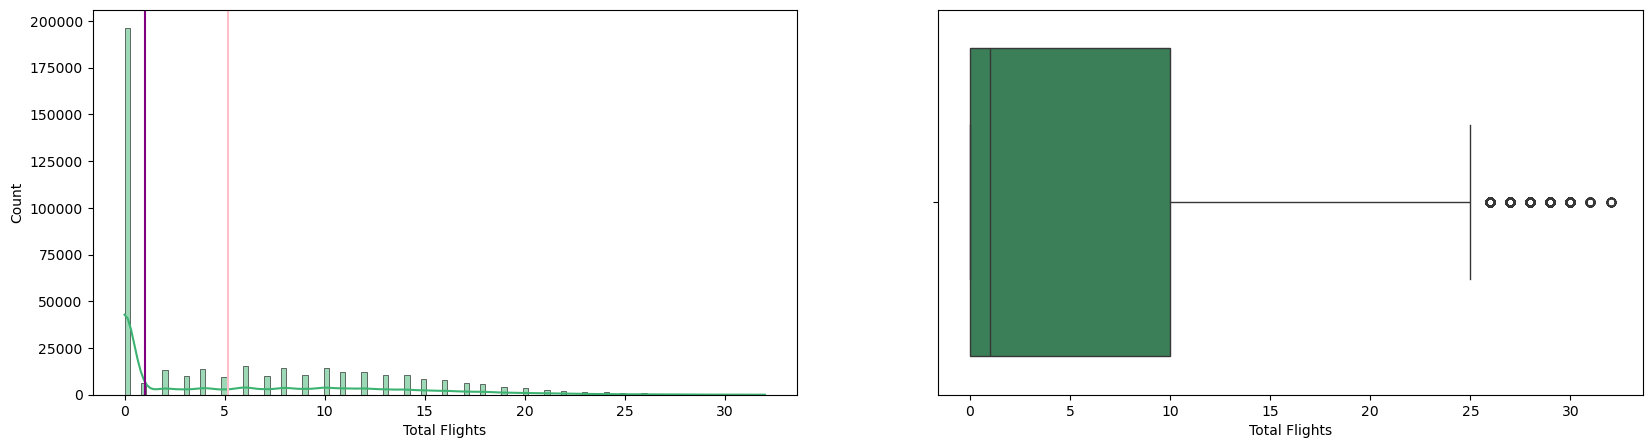

In [36]:
sp_t.exploracion_numerica(df_total, 'Total Flights')

El número total de vuelos se caracteriza por concentrarse en 0 y extenderse hacia la derecha, siendo su 50% entre 0 y 10 vuelos. Tenemos una fuerte asimetría. Los valores atípicos incrementan erroneamente el promedio y aparecen a partir de 25. Podemos interpretar que lo normal es que los cliente no volaron o realizaron escasos vuelos, pero los que sí, lo hicieron con mucha frecuencia.

==================== ANALISIS ESTADÍSTICO COLUMNA: Points Accumulated ====================
---------------------------------------------------------------------------
El mínimo de Points Accumulated es: 0.0
---------------------------------------------------------------------------
El máximo de Points Accumulated es: 676.5
---------------------------------------------------------------------------
La media de Points Accumulated es: 124.26376126907071
---------------------------------------------------------------------------
La mediana de Points Accumulated es: 53.0
---------------------------------------------------------------------------
La Desviación Estandar de Points Accumulated es: 146.69617864494657
---------------------------------------------------------------------------
==================== VALORES NULOS COLUMNA: Points Accumulated ====================
---------------------------------------------------------------------------
Porcentaje nulos de Points Accumulated: 0.0
---

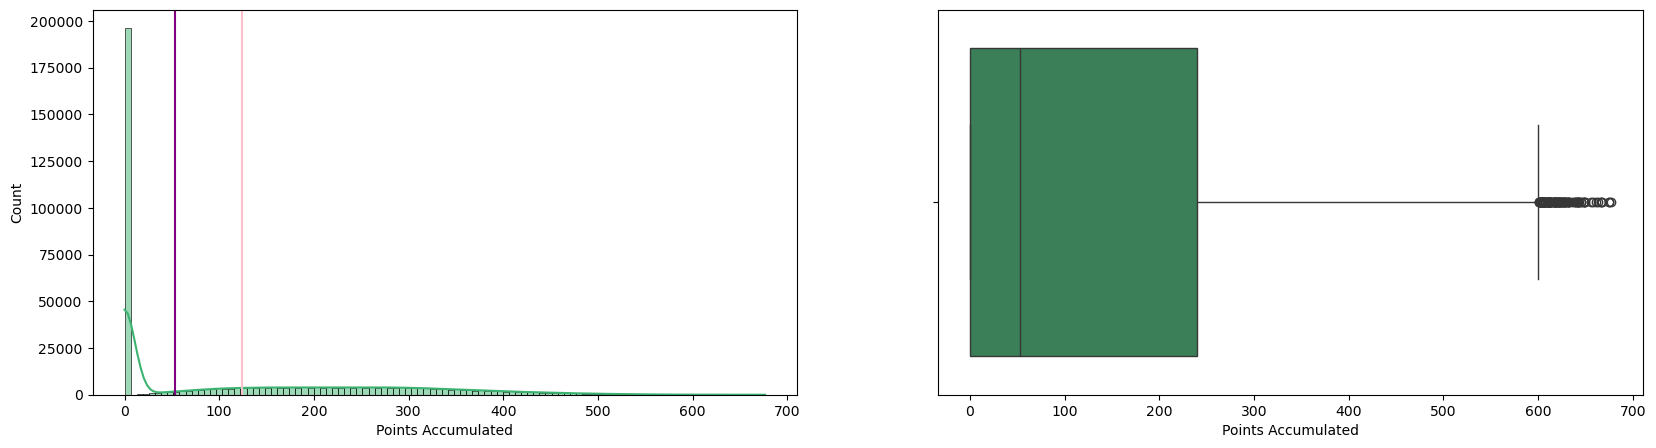

In [37]:
sp_t.exploracion_numerica(df_total, 'Points Accumulated')

Como veíamos en los datos, la mayoría de clientes acumulan cantidades nulas de puntos, moviéndose el 50% no más de 250 puntos. Sólo unos pocos tienen cantidades muy dispersas (+600), lo que distorsiona la media.

EXPLORAMOS ALGUNA COLUMNA CATEGÓRICA:

==================== ANALISIS ESTADÍSTICO COLUMNA: Marital Status ====================
---------------------------------------------------------------------------
Conteo de categorías unicas de Marital Status: 3
---------------------------------------------------------------------------
Valores únicos de Marital Status es: ['Married' 'Single' 'Divorced']
---------------------------------------------------------------------------
La Categoría más frecuente/moda de Marital Status es: 0    Married
Name: Marital Status, dtype: object
---------------------------------------------------------------------------
Número total de registros de Marital Status es: 403760
---------------------------------------------------------------------------
==================== VALORES NULOS COLUMNA: Marital Status ====================
---------------------------------------------------------------------------
Porcentaje nulos de Marital Status: 0.0
-------------------------------------------------------------

 ###VISUALIZACIÓN: Marital Status

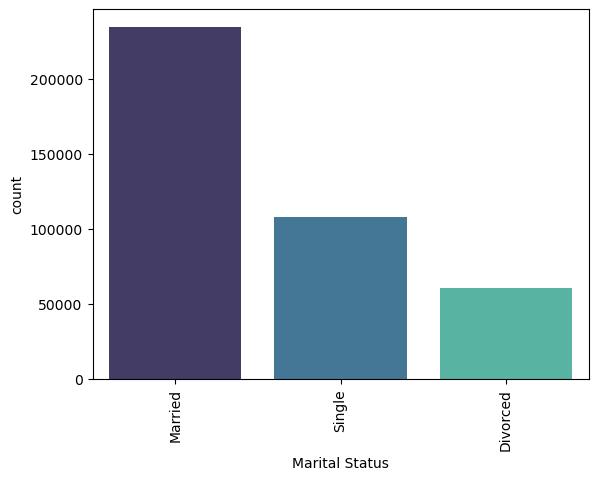

In [38]:
sp_t.exploracion_categorica(df_total, 'Marital Status')

El groso de los clientes tienen como estado civil casado.

==================== ANALISIS ESTADÍSTICO COLUMNA: City ====================
---------------------------------------------------------------------------
Conteo de categorías unicas de City: 29
---------------------------------------------------------------------------
Valores únicos de City es: ['Edmonton' 'Toronto' 'Dawson Creek' 'Vancouver' 'Regina' 'Montreal'
 'Sudbury' 'Winnipeg' 'Quebec City' 'Peace River' "St. John's" 'Tremblant'
 'Ottawa' 'Trenton' 'Thunder Bay' 'West Vancouver' 'Fredericton' 'London'
 'Halifax' 'Moncton' 'Banff' 'Kingston' 'Whistler' 'Charlottetown' 'Hull'
 'Victoria' 'Calgary' 'Kelowna' 'Whitehorse']
---------------------------------------------------------------------------
La Categoría más frecuente/moda de City es: 0    Toronto
Name: City, dtype: object
---------------------------------------------------------------------------
Número total de registros de City es: 403760
---------------------------------------------------------------------------
==========

 ###VISUALIZACIÓN: City

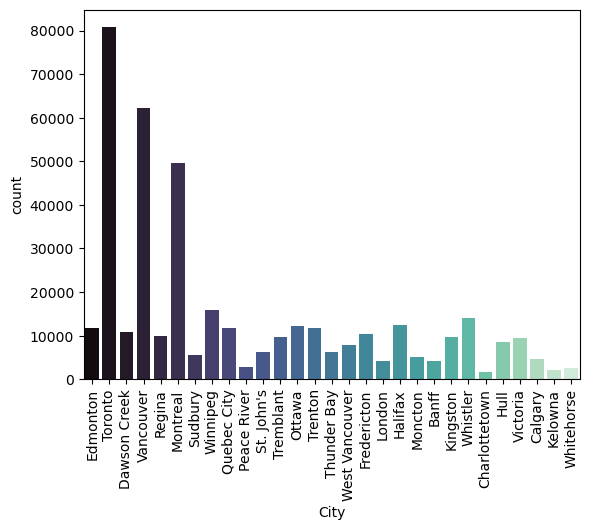

In [39]:
sp_t.exploracion_categorica(df_total, 'City')

Tras haber comprobado que todos los ciudadanos son del mismo país, Canadá, (eliminamos gráfica). Están distribuidos en 29 ciudades y se agrupa principalmente en Toronto, Vancouver y Montreal.

2. **Limpieza de Datos:**
   - Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.
   - Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.
   - Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.

### visualización columnas nulos:

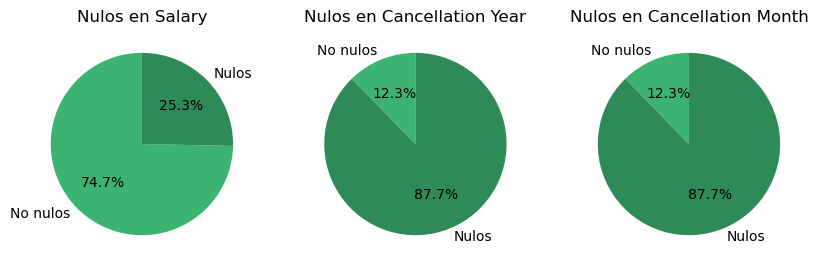

In [40]:
col1 = 'Salary'
col2 = 'Cancellation Year'
col3 = 'Cancellation Month'

cols = [col1, col2, col3]
sp_t.visualizacion_nulos(df_total, cols)

SALARY:
1. 25.3% nulos
2. datos negativos que marca el min()
3. float64

In [41]:
df_total['Salary'].describe()

count    301500.000000
mean      79258.576285
std       34983.929798
min      -58486.000000
25%       59262.000000
50%       73479.000000
75%       88606.000000
max      407228.000000
Name: Salary, dtype: float64

In [42]:
df_total[df_total['Salary']<0]

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
7032,115505,2017,1,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,4,NaN,NaN
7033,115505,2017,2,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,4,NaN,NaN
7034,115505,2017,3,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,4,NaN,NaN
7035,115505,2017,4,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,4,NaN,NaN
7036,115505,2017,5,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387811,959977,2018,8,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,-12497.0,Married,Aurora,9453.00,2018 Promotion,2018,3,NaN,NaN
387812,959977,2018,9,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,-12497.0,Married,Aurora,9453.00,2018 Promotion,2018,3,NaN,NaN
387813,959977,2018,10,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,-12497.0,Married,Aurora,9453.00,2018 Promotion,2018,3,NaN,NaN
387814,959977,2018,11,12,2,14,2450,245.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,-12497.0,Married,Aurora,9453.00,2018 Promotion,2018,3,NaN,NaN


Ya que el valor negativo transformado en positivo tendría cabida en cualquier rango salarial, optamos por la opción de convertirlos en valores absolutos entenfiendo que ha sido un error en el registro de los datos. 

In [43]:
df_total['Salary']=df_total['Salary'].abs()

In [44]:
sp_t.exploracion_outliers(df_total, 'Salary')

==================== ANALISIS PERCEPTILES Y OUTLIERS COLUMNA: Salary ====================
---------------------------------------------------------------------------
El Q1 de Salary es: 59262.0
---------------------------------------------------------------------------
El Q3 de Salary es: 88606.0
---------------------------------------------------------------------------
El IQR de Salary es: 29344.0
---------------------------------------------------------------------------
El Salto de Salary es: 44016.0
---------------------------------------------------------------------------
El bigote derecho de Salary es: 132622.0
---------------------------------------------------------------------------
El bigote izquierdo de Salary es: 44590.0
---------------------------------------------------------------------------
registros inualmente altos de la columna Salary:
==================== ANALISIS PERCEPTILES Y OUTLIERS COLUMNA: Salary ====================
        Loyalty Number  Year  Month  Fli

Decisión respecto a Salary:

mantenemos NaN como valor nulo. La alta presencia de outliers distorsiona las métricas de media y mediana por lo que desecho esa imputación. Eliminar registros tampoco es una opción, ya que no queremos perder información de los clientes.
Por otro lado ya que mantenemos NaN y sólo puede existir en columnas tipo float en Pandas, no modificamos el tipo de float64 a int64

NULOS EN LAS COLUMNAS:

Cancellation Year:  float64

Cancellation Month: float64

In [45]:
df_total['Cancellation Month'].unique()

array([nan,  3.,  8.,  6.,  9.,  2.,  7., 10.,  1.,  4., 12., 11.,  5.])

In [47]:
df_total['Cancellation Year'].unique()

array([  nan, 2018., 2015., 2016., 2014., 2017., 2013.])

Entendemos los valores NaN como no cancelación. No puede tener fecha, se asigna por defecto. Mantenemos por tanto las columnas integras con tipo float64 para ser entendido por Pandas. 
Para mejor comprensión añadimos una nueva columna 'Cancellation' en base a 'Cancellation Year' con valores boleanos que otorgue True si hay valor y False a NaN, para tener una visón global del conjunto (un marco más general que no abarca meses). 

In [49]:
df_total['Cancellation'] = np.where(df_total['Cancellation Year'].isna(), False, True)

In [50]:
df_total.head(4)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Cancellation
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,False
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,False
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,False
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,False


In [51]:
df_total['Cancellation'].value_counts() #VEMOS COMO NO CANCELACIÓN ANUAL ES EL DATO POR MAYORÍA DE CLIENTES. 

Cancellation
False    354110
True      49650
Name: count, dtype: int64

In [53]:
df_total['Cancellation'].value_counts(normalize=True)*100 ##UN 87% DE CLIENTES NO CANCELARON

Cancellation
False    87.703091
True     12.296909
Name: proportion, dtype: float64

LIMPIEZA TERMINADA:
EXPORTAMOS CSV LIMPIO 

In [54]:
df_total.to_csv('data_privada/Customer_Flight_and_Loyalty.csv', index=False)

### Fase 2: Visualización

Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:  

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

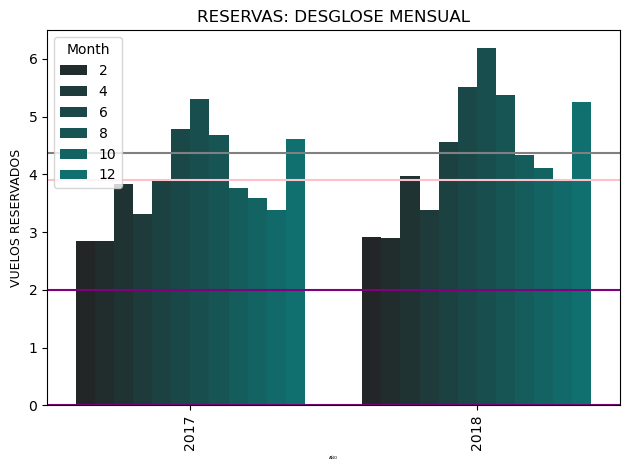

In [69]:
media_2017 = df_total[df_total['Year'] == 2017]['Flights Booked'].mean()
mediana_2017 = df_total[df_total['Year'] == 2017]['Flights Booked'].median()
media_2018 = df_total[df_total['Year'] == 2018]['Flights Booked'].mean()
mediana_2018 = df_total[df_total['Year'] == 2018]['Flights Booked'].median()

sns.barplot(x = 'Year',
            y = 'Flights Booked',
            data= df_total,
            color = 'teal', 
            hue='Month',
            errorbar=None)

plt.axhline(media_2017, color = 'pink')
plt.axhline(mediana_2017, color = 'purple')
plt.axhline(media_2018, color = 'grey')
plt.axhline(mediana_2018, color = 'purple')

plt.xticks(rotation=90)
plt.xlabel('AÑO', fontsize = 3)
plt.ylabel('VUELOS RESERVADOS',  fontsize = 9)
plt.title('RESERVAS: DESGLOSE MENSUAL',  fontsize = 12)
plt.tight_layout()
plt.show();

No se observa gran diferencia entre ambos años. 2018 tiene incrementeo en reservas especialmente entre los meses 6 y 8 y el mes 12. En ambas gráficas vemos una estructura similar: las reservas se incrementan en los meses de verano, superando las 6 reservas en 2018 y de igual modo en diciembre, superando 5 reservas. Los meses de menor demanda no llegan a 3 reservas.

la mediana en ambos casos la tendríamos en 2 reservas en ambos años, y la media difiere por encima de 4 (gris) para 2018, creciendo el promedio con ese incremento de reservas.


2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

3. ¿Cuál es la distribución de los clientes por provincia o estado?

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad? 

6. ¿Cómo se distribuyen los clientes según su estado civil y género?